In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet34_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.2).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.201, ECE: 0.020
Optimal temperature: 1.127
After temperature - NLL: 1.209, ECE: 0.037


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9548 ± 0.0010
Final Average Prediction Set Size: 29.16 ± 0.64
Final Average Coverage: 0.9496 ± 0.0013
Final Average Real Probability: 0.8972 ± 0.0018


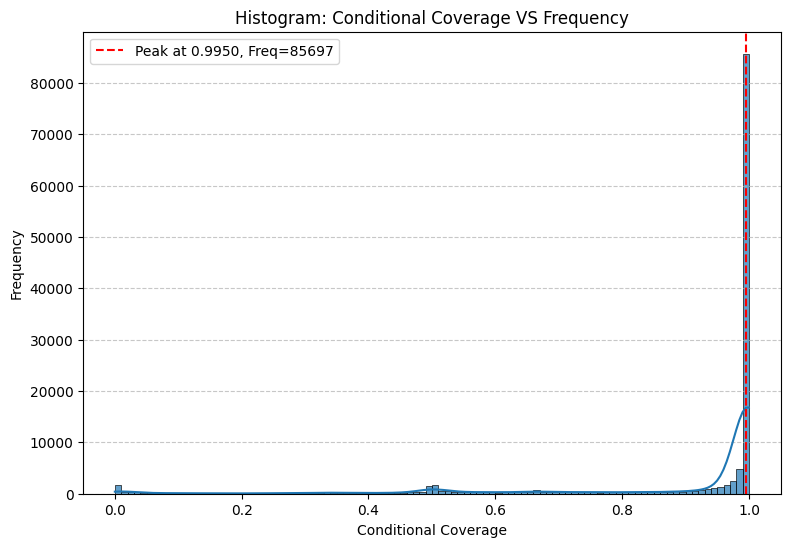

85697 (68.91%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.4221 ± 0.0622
Final Average Prediction Set Size: 10.98 ± 0.37
Final Average Coverage: 0.9496 ± 0.0019
Final Average Real Probability: 0.8732 ± 0.0039


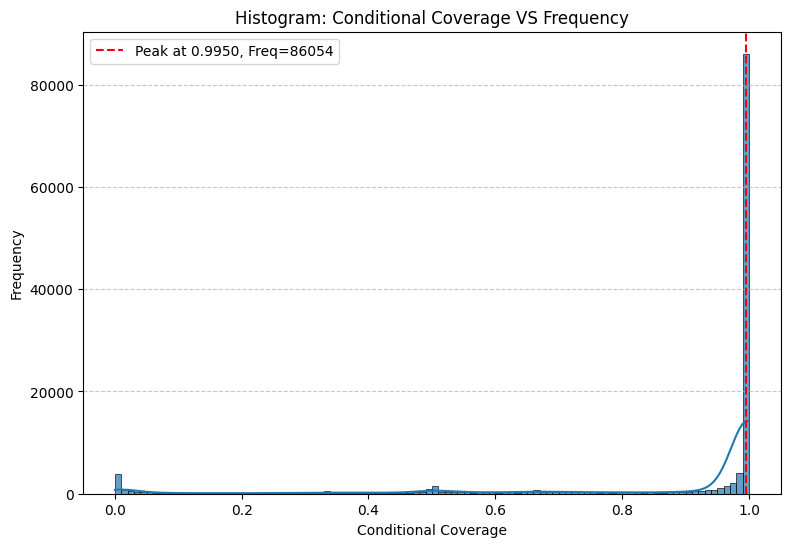

86054 (69.20%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.2, k_reg=9, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0494 ± 0.0085
Final Average Prediction Set Size: 7.46 ± 0.16
Final Average Coverage: 0.9496 ± 0.0017
Final Average Real Probability: 0.8741 ± 0.0035


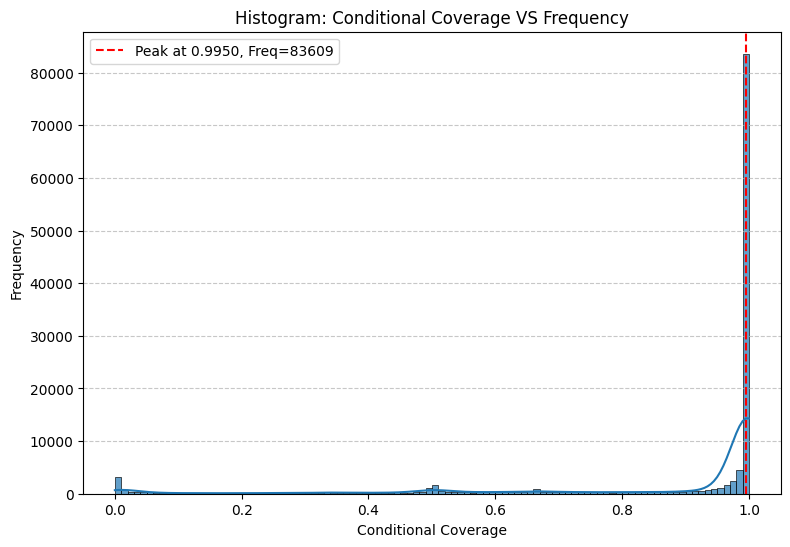

83609 (67.23%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9548 ± 0.0010
Final Average Prediction Set Size: 29.16 ± 0.64
Final Average Coverage: 0.9496 ± 0.0013
Final Average Real Probability: 0.8972 ± 0.0018


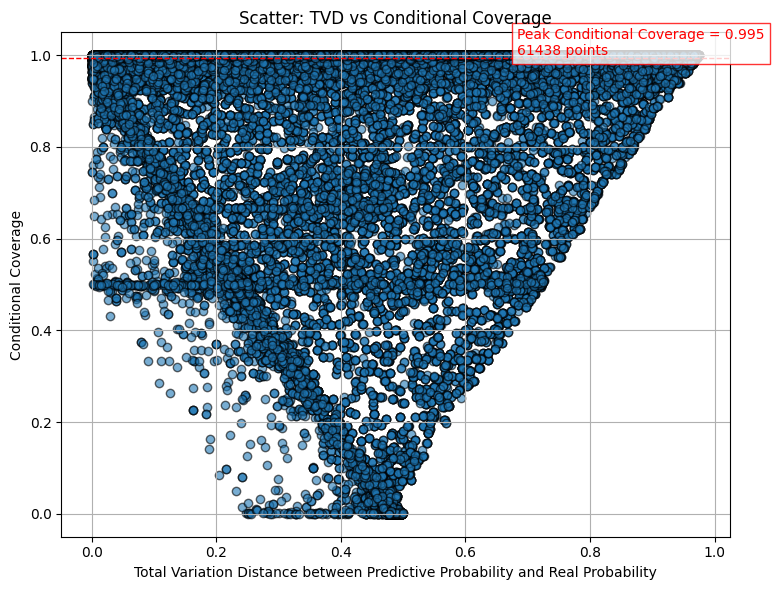

Peak Conditional Coverage = 0.995, with 61438 samples

=== Count Regions Summary ===
41075 (33.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
39374 (31.7%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
16999 (13.7%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.87759', '0.09589']
  Real Probability Set      : ['0.97944', '0.00086']
Sample 2:
  Predictive Probability Set: ['0.41453', '0.28968', '0.25456']
  Real Probability Set      : ['0.35528', '0.28373', '0.36066']
Sample 3:
  Predictive Probability Set: ['0.50761', '0.47029']
  Real Probability Set      : ['0.50002', '0.49998']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.46250', '0.17686', '0.11167', '0.09811', '0.08152']
  Real Probability Set      : ['0.02680', '0.04021', '0.02680', '0.04021', '0.04021']
Sample 2:
  Predictive Probability Set: ['0.97118']
 

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.4221 ± 0.0622
Final Average Prediction Set Size: 10.98 ± 0.37
Final Average Coverage: 0.9496 ± 0.0019
Final Average Real Probability: 0.8732 ± 0.0039


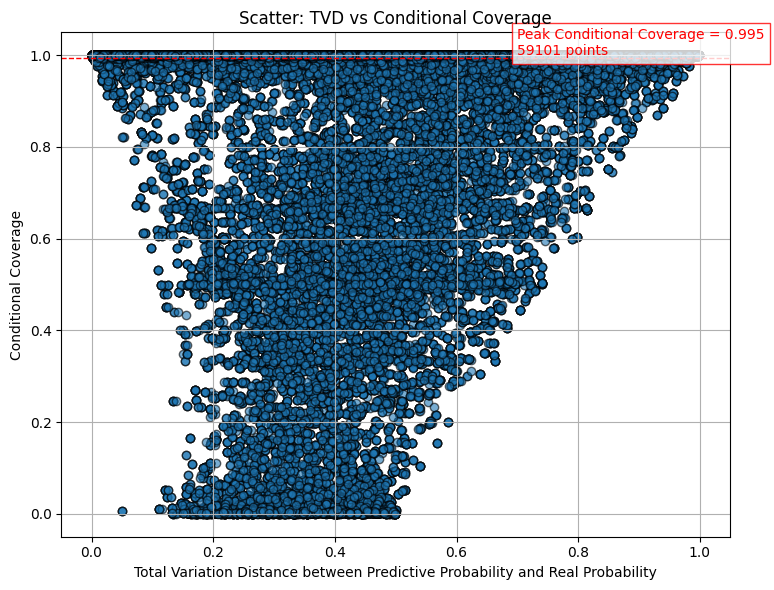

Peak Conditional Coverage = 0.995, with 59101 samples

=== Count Regions Summary ===
39726 (31.9%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35903 (28.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
18761 (15.1%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97583', '0.00581', '0.00449', '0.00312', '0.00208', '0.00135', '0.00089', '0.00072', '0.00048', '0.00045', '0.00044']
  Real Probability Set      : ['0.93680', '0.00000', '0.00251', '0.00251', '0.05315', '0.00000', '0.00000', '0.00251', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.56232', '0.43303', '0.00313', '0.00089', '0.00041', '0.00008', '0.00003', '0.00002', '0.00002', '0.00001', '0.00001']
  Real Probability Set      : ['0.50066', '0.49934', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predict

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.2, k_reg=9, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0494 ± 0.0085
Final Average Prediction Set Size: 7.46 ± 0.16
Final Average Coverage: 0.9496 ± 0.0017
Final Average Real Probability: 0.8741 ± 0.0035


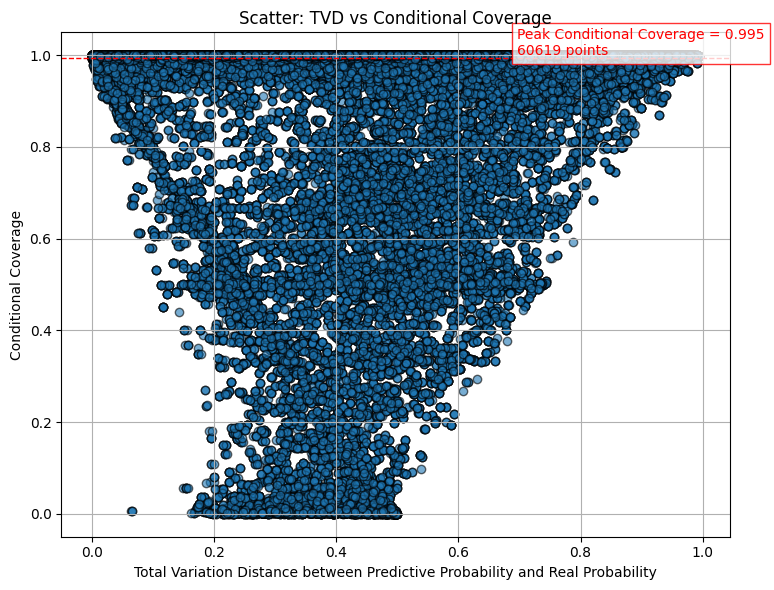

Peak Conditional Coverage = 0.995, with 60619 samples

=== Count Regions Summary ===
41958 (33.7%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
37102 (29.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
18380 (14.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97918', '0.01489']
  Real Probability Set      : ['0.88357', '0.10699']
Sample 2:
  Predictive Probability Set: ['0.93184', '0.02647', '0.01953']
  Real Probability Set      : ['0.96975', '0.00922', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.58274', '0.40858', '0.00428', '0.00060', '0.00021', '0.00020', '0.00019', '0.00016', '0.00012', '0.00010', '0.00010']
  Real Probability Set      : ['0.54081', '0.45750', '0.00056', '0.00056', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Se

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05)